In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import Bunch

%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

In [2]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder with different Shape and i am converting into 64.64
    
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to 
    the main folder holding one subfolder per category[Sunflower, Pizza,Dollars]
    
    dimension : tuple
        size to which image are adjusted to 64 * 64
    Returns
    -------
    Bunch images to array 
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    
    descr = """A image classification dataset We are Converting the Data in Equal Dimension like 64*64
    Number of images are in SubFolders is = 195
    Names of Images with Differernt type = ['sunflower','pizza','dollar_bill']
    
    The Data Is in Different Dimension we Have to Convert into the 64*64 images
    """
    images = []
    flat_data = []
    target = []
    
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            #plt.imshow(img)  # Original Images we have to Converting Image 
            #plt.show()
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)  # After Converting The Image
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

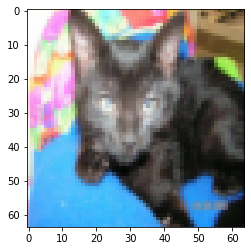

In [3]:
import skimage
image_dataset = load_image_files("/home/hemanth/Documents/DeepLearning/image/")

In [4]:
print(image_dataset.DESCR)

A image classification dataset We are Converting the Data in Equal Dimension like 64*64
    Number of images are in SubFolders is = 195
    Names of Images with Differernt type = ['sunflower','pizza','dollar_bill']
    
    The Data Is in Different Dimension we Have to Convert into the 64*64 images
    


In [5]:
image_dataset.data[0:5]

array([[0.48187136, 0.53677332, 0.38110256, ..., 0.46675571, 0.51715686,
        0.25891257],
       [0.70175398, 0.63484222, 0.53300398, ..., 0.59554228, 0.64162071,
        0.52838542],
       [0.84313725, 0.82745098, 0.81568627, ..., 0.47738971, 0.55582108,
        0.66170343],
       [1.        , 1.        , 0.80784314, ..., 1.        , 1.        ,
        0.80784314],
       [0.44411765, 0.47901348, 0.31636508, ..., 0.19206495, 0.2018076 ,
        0.14157475]])

In [6]:
image_dataset.images[0].shape

(64, 64, 3)

In [7]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
image_dataset.target_names


['flowers', 'dog', 'cat']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target,test_size= 0.5,random_state=109)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82, 12288)
(83, 12288)
(82,)
(83,)


In [11]:
from sklearn.svm import SVC
Svc = SVC(gamma='auto')

In [12]:
Svc.fit(X_train,y_train)

SVC(gamma='auto')

In [15]:
Svc.score(X_train,y_train)


0.5487804878048781

In [16]:
Svc.score(X_test,y_test)


0.4819277108433735

In [17]:
New_predict =Svc.predict(X_test)
New_predict[0:5]

array([0, 0, 0, 0, 0])

In [18]:
pd.DataFrame({'Actual_Data':y_test,
             'New_predict':New_predict})

,Actual_Data,New_predict
0,1,0
1,0,0
2,2,0
3,0,0
4,1,0
...,...,...
78,1,0
79,0,0
80,1,0
81,2,0


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
cm = confusion_matrix(New_predict,y_test)
cm

array([[40, 27, 16],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [22]:
import seaborn as sns

<AxesSubplot:>

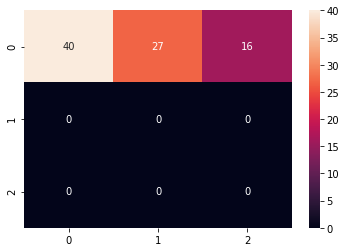

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
print(classification_report(New_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        83
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.48        83
   macro avg       0.33      0.16      0.22        83
weighted avg       1.00      0.48      0.65        83



/home/hemanth/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn import svm
aram_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01], 'kernel': ['rbf','poly','sigmoid']}
 ]
svc = svm.SVC()
svc

SVC()

In [28]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc, param_grid)
clf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01],
                          'kernel': ['rbf', 'poly', 'sigmoid']}])

In [29]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01],
                          'kernel': ['rbf', 'poly', 'sigmoid']}])

In [30]:
y_pred = clf.predict(X_test)
y_pred


array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [31]:
y_test

array([1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0,
       2, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2])

In [37]:
import sklearn.metrics as metrics
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01],
                          'kernel': ['rbf', 'poly', 'sigmoid']}]):
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        40
           1       0.67      0.89      0.76        27
           2       0.00      0.00      0.00        16

    accuracy                           0.76        83
   macro avg       0.50      0.62      0.55        83
weighted avg       0.62      0.76      0.68        83




/home/hemanth/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
metrics.confusion_matrix(y_test,y_pred)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 5, 11,  0]])

In [39]:
metrics.accuracy_score(y_test,y_pred)

0.7590361445783133

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cv = cross_val_score(clf,X_train,y_train,cv=10)

In [42]:
np.min(cv)

0.625

In [43]:
np.max(cv)

0.875

In [44]:
np.mean(cv)

0.7319444444444445

In [47]:
clf.predict(image_dataset.data[[160]])

array([1])